In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

#Suppress FutureWarning related to use_inf_as_na
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [83]:
# Load the dataset
file_path = 'credit_card_fraud.csv'
data = pd.read_csv(file_path)

In [84]:
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


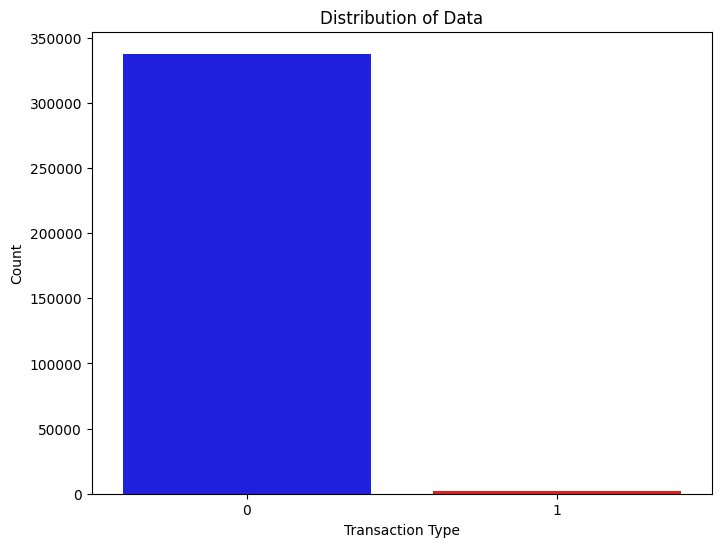

In [96]:
# Univariate Analysis
plt.figure(figsize=(8,6))
custom_palette = ["blue", "red"]
sns.countplot(x='is_fraud', data=data, palette=custom_palette)
plt.title('Distribution of Data')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [86]:
# Convert transaction date to datetime and extract usefull parts
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()
data['month'] = data['trans_date_trans_time'].dt.month_name()

In [87]:
# Descriptive Statistics
descriptive_stats = data.describe()

# Print output
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                trans_date_trans_time            amt            lat  \
count                         339607  339607.000000  339607.000000   
mean   2020-01-20 13:19:14.688342784      70.577984      39.718991   
min              2019-01-01 00:00:44       1.000000      20.027100   
25%              2019-07-22 21:51:49       9.600000      36.715400   
50%              2019-12-31 15:11:23      46.460000      39.617100   
75%              2020-07-23 11:22:32      83.350000      41.710000   
max              2020-12-31 23:59:24   28948.900000      66.693300   
std                              NaN     161.675242       5.094961   

                long      city_pop      merch_lat     merch_long  \
count  339607.000000  3.396070e+05  339607.000000  339607.000000   
mean     -110.622605  1.071409e+05      39.718853    -110.622383   
min      -165.672300  4.600000e+01      19.027422    -166.671575   
25%      -120.093600  4.710000e+02      36.817194    -119.823755   
50% 

In [88]:
# Categorical Analysis
category_fraud = data.groupby('category')['is_fraud'].agg(['count', 'sum'])
category_fraud['fraud_percentage'] = (category_fraud['sum']/category_fraud['count']) * 100

# Print output
print("\nCategory Fraud Analysis:\n", category_fraud)


Category Fraud Analysis:
                 count  sum  fraud_percentage
category                                    
entertainment   24222   55          0.227066
food_dining     23038   38          0.164945
gas_transport   35089  153          0.436034
grocery_net     11355   27          0.237781
grocery_pos     32732  433          1.322864
health_fitness  22593   36          0.159341
home            32516   50          0.153770
kids_pets       29704   55          0.185160
misc_net        16898  217          1.284176
misc_pos        20024   62          0.309628
personal_care   24406   55          0.225354
shopping_net    26379  381          1.444331
shopping_pos    30329  187          0.616572
travel          10322   33          0.319705


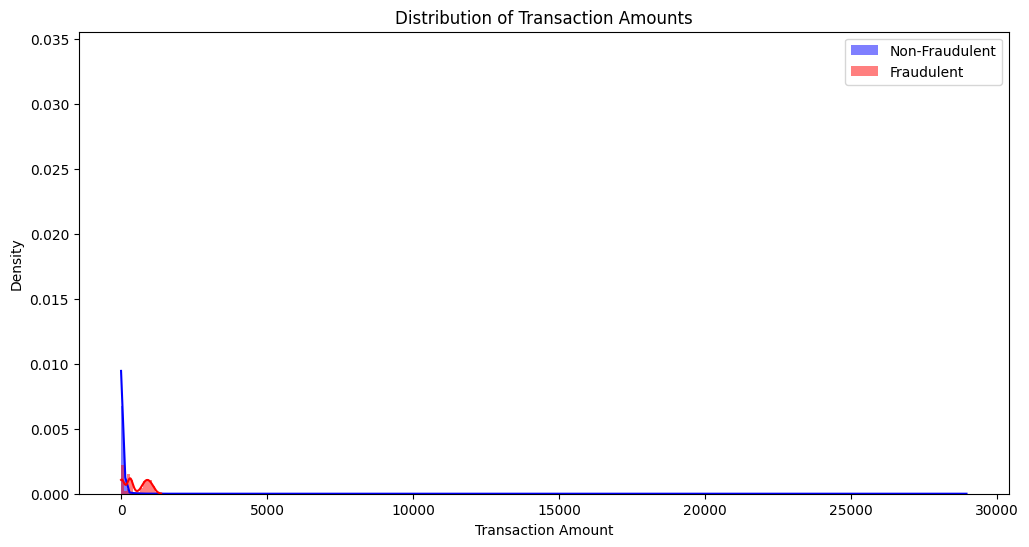

In [89]:
# Transaction Amount Analysis
fraudulent_transactions = data[data['is_fraud'] == 1]
non_fraudulent_transactions = data[data['is_fraud'] == 0]

plt.figure(figsize=(12, 6))
sns.histplot(non_fraudulent_transactions['amt'], color="blue", label='Non-Fraudulent', kde=True, stat="density", linewidth=0)
sns.histplot(fraudulent_transactions['amt'], color="red", label='Fraudulent', kde=True, stat="density", linewidth=0)
plt.title('Distribution of Transaction Amounts')
plt.legend()
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

In [90]:
# Advanced Temporal Analysis
# Hourly Fraud Rate
fraud_hourly = fraudulent_transactions.groupby('hour').size()
total_hourly = data.groupby('hour').size()
fraud_rate_hourly = (fraud_hourly / total_hourly) * 100

# Daily Fraud Rate
fraud_dayofweek = fraudulent_transactions.groupby('day_of_week').size()
total_dayofweek = data.groupby('day_of_week').size()
fraud_rate_dayofweek = (fraud_dayofweek / total_dayofweek) * 100

# Monthly Fraud Rate
fraud_monthly = fraudulent_transactions.groupby('month').size()
total_monthly = data.groupby('month').size()
fraud_rate_monthly = (fraud_monthly / total_monthly) * 100


# Print outputs:
print("\nHourly Fraud Rate:\n", fraud_rate_hourly)
print("\nDaily Fraud Rate:\n", fraud_rate_dayofweek)
print("\nMonthly Fraud Rate:\n", fraud_rate_monthly)


Hourly Fraud Rate:
 hour
0     1.521877
1     1.494529
2     1.270533
3     1.273715
4     0.064197
5     0.090719
6     0.062808
7     0.081125
8     0.107885
9     0.100027
10    0.089904
11    0.054466
12    0.099021
13    0.081752
14    0.088868
15    0.128138
16    0.131692
17    0.117571
18    0.105752
19    0.063668
20    0.132963
21    0.098454
22    2.588774
23    2.620461
dtype: float64

Daily Fraud Rate:
 day_of_week
Friday       0.663017
Monday       0.486676
Saturday     0.618161
Sunday       0.437454
Thursday     0.519894
Tuesday      0.449541
Wednesday    0.582302
dtype: float64

Monthly Fraud Rate:
 month
April        0.488103
August       0.481348
December     0.313674
February     0.948532
January      0.737024
July         0.395219
June         0.289135
March        0.832482
May          0.620679
November     0.317133
October      0.596967
September    0.759445
dtype: float64


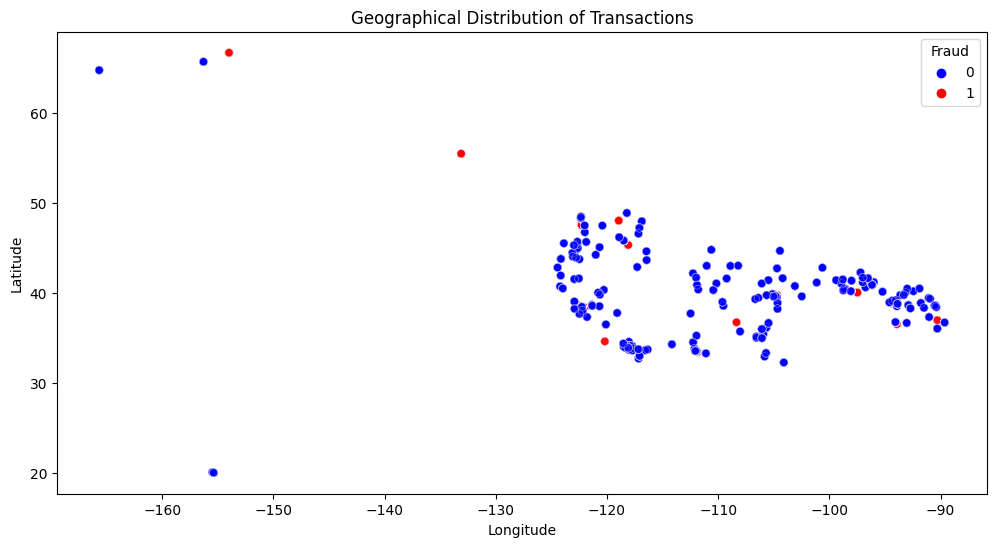

In [94]:
# Geographical Analysis
plt.figure(figsize=(12, 6))
custom_palette = {0: "blue", 1: "red"}
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=data, palette=custom_palette, alpha=0.3)
plt.title('Geographical Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fraud', loc='upper right')
plt.show()


Correlation Matrix:
                  amt       lat      long  city_pop  merch_lat  merch_long  \
amt         1.000000  0.002817 -0.007017  0.006050   0.002957   -0.006891   
lat         0.002817  1.000000 -0.151364 -0.236336   0.993646   -0.151267   
long       -0.007017 -0.151364  1.000000 -0.066080  -0.150385    0.998960   
city_pop    0.006050 -0.236336 -0.066080  1.000000  -0.235019   -0.066052   
merch_lat   0.002957  0.993646 -0.150385 -0.235019   1.000000   -0.150278   
merch_long -0.006891 -0.151267  0.998960 -0.066052  -0.150278    1.000000   
is_fraud    0.201023  0.009239 -0.004494  0.002338   0.008848   -0.004550   
hour       -0.032631 -0.012251  0.022051  0.009314  -0.011991    0.021973   

            is_fraud      hour  
amt         0.201023 -0.032631  
lat         0.009239 -0.012251  
long       -0.004494  0.022051  
city_pop    0.002338  0.009314  
merch_lat   0.008848 -0.011991  
merch_long -0.004550  0.021973  
is_fraud    1.000000  0.012388  
hour        0.012388

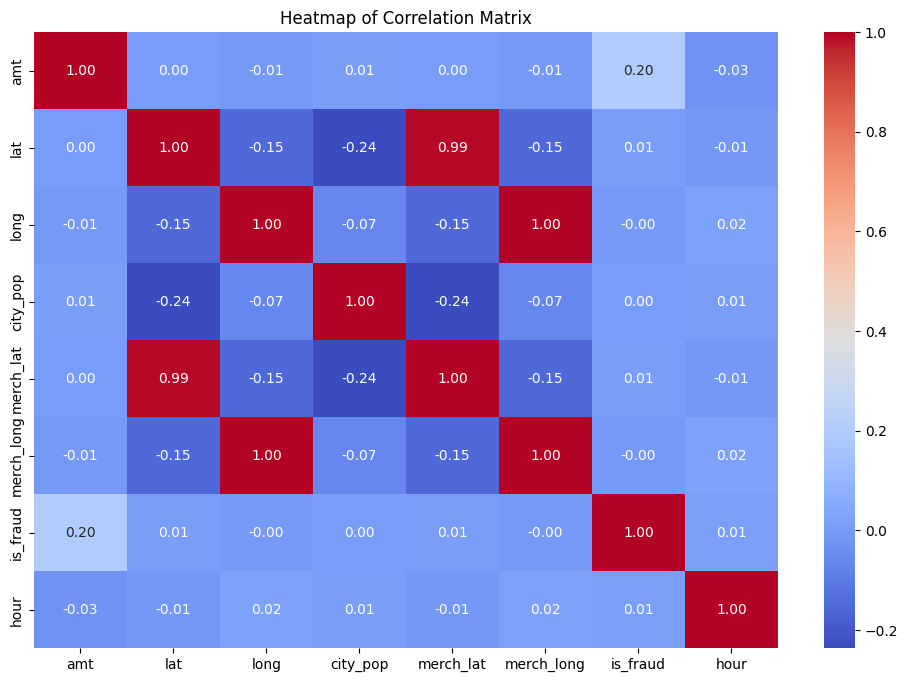

In [92]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation Analysis
correlation_matrix = numeric_data.corr()

# Print output
print("\nCorrelation Matrix:\n", correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

<h1> Summary of Exploratory Data Analysis: </h1>  

<h2> Overview: </h2>
<h4> The EDA focused on a dataset comprising of credit card transactions, including details like transaction amount, date/time, merchant information, geographical coordinates, and a binary fraud label. The primary objective was to uncover patterns, anomalies, and relationships that could be indicative of fradulent activity. </h4>

<h2> Key Findings: </h2>

<h3> 1. Descriptive Statistics: </h3>
<h4> The average transaction amount (`amt`) was approximately \$70.58, with transactions ranging from a minimum of \$1 to a maximum of \$28,948.90.</h4>
<h4> The dataset revealed transactions spread across various regions, as indicated by the latitude (lat) and longitude (long) data. The average city population associated with these transactions was around 107,141. This demographic information can be essential in contextualizing transaction patterns and understanding the geographical spread of both legitimate and fraudulent activities. </h4>
<h3> 2. Transaction Amount Analysis: </h3>
<h4> Distinct distribution patterns were observed between fraudulent and non-fraudulent transactions. Fraudulent transactions tended to have higher amounts, suggesting the amt feature's importance in detecting fraud.</h4>
<h3> 3. Temporal Analysis: </h3>
<h4> Significant variations were noted in transaction frequencies across different hours, days, and months. Notably, late-night hours, particularly around 22:00 and 23:00, showed higher fraud rates. </h4>
<h4> Days like Wednesday and Friday, as well as months like February, March, January, and September, exhibited elevated fraud rates.</h4>
<h3> 4. Geographical Analysis: </h3>
<h4>Explored the spatial distribution of transactions but did not find clear geographical patterns associated with fraud. </h4>
<h4>This analysis underscored the need for more nuanced geographical feature engineering. </h4>
<h3> 5. Categorical Analysis: </h3>
<h4> Certain transaction categories, such as 'Grocery POS' and 'Shopping Net', displayed a higher propensity for fraud, indicating their potential as predictive features. </h4>
<h3> 6. Correlation Analysis: </h3>
<h4>The correlation matrix revealed that while some features showed notable correlations with fraud, many did not exhibit strong linear relationships. For instance, a positive correlation (0.201) was observed between the transaction amount (amt) and the occurrence of fraud (is_fraud). </h4>

<h2> Implications of Feature Engineering </h2>
<h4>These insights provide a strong foundation for the feature engineering phase. Key areas to focus on include the creation of temporal features (to capture high-risk times), the incorporation of transaction categories into predictive models, and the exploration of more sophisticated geographical features. Additionally, the distinct patterns in transaction amounts between fraudulent and non-fraudulent transactions underscore the importance of this variable in model development. </h4>

<h2> Conclusion: </h2>
<h4> The EDA provided valuable insights into the dataset, highlighting specific areas and patterns crucial for fraud detection. These findings will guide the subsequent feature engineering and model building stages, aiming to develop an effective system for detecting fraudulent credit card transactions.</h4>